
## Unit - COMP329: Artificial Intelligence


### Write your Details below:

# The goal of this assignment is to appreciate the power of Evolutionary Algorithms (e.g., Genetic Algorithm, or GA in short) for solving real-world problems such as the Travelling Salesman Problem (TSP)

## Travelling Salesman Problem:
### Acknowledgment: 
#### The following is largely based on Peter Norvig's note on TSP: (https://github.com/norvig/pytudes/blob/master/ipynb/TSP.ipynb)
#### Given a set of cities and the distance between each pair of cities, what is the shortest possible tour that visits each city exactly once, and returns to the starting city?

<img src="tsp.png">

#### Let's us define the problem more precisely
- ***Given a set of cities***
<br>A Python `set` could represent a set of cities. An individual city might be just an integer index, or it might be (x, y) coordinates.
- ... ***and the distance between each pair of cities***: 
<br>We could use either a function, `distance(A, B),` or a table, `distance[A, B]`.
- ... ***what is the shortest possible tour***
<br>A tour is a sequential order in which to visit the cities; a function `shortest_tour(tours)` should find the one that minimizes `tour_length(tour)`, which is the sum of the distances between adjacent cities in the tour. 
- ... ***that visits each city once and returns to the starting city***
<br>Make sure a tour doesn't re-visit a city (except returning to the start).

### The *vocabulary* of the problem:

- **City**: For the purpose of this exercise, a city is "atomic" in the sense that we don't have to know anything about the components or attributes of a city, just how far it is from other cities.
- **Cities**: We will need to represent a set of cities; Python's `set` datatype might be appropriate for that.
- **Distance**: We will need the distance between two cities.  If `A` and `B` are cities. This could be done with a function, `distance(A, B)`, or with a dict, `distance[A][B]` or `distance[A, B]`, or with an array if `A` and `B` are integer indexes.  The resulting distance will be a real number (which Python calls a `float`).
- **Tour**: A tour is an ordered list of cities; Python's `list` or `tuple` datatypes would work.
- **Total distance**: The sum of the distances of adjacent cities in the tour. 

In [82]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import random, operator, time, itertools, math
import numpy

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

### First algorithm: find the tour with shortest total distance from all possible tours

> *Generate all the possible tours of the cities, and choose the shortest one (the tour with the minimum total distance).*

### Representing Tours

- A tour starts in one city, and then visits each of the other cities in order, before finally retirning to the start. 
- A natural representation of the set of available cities is a Python `set`, and a natural representation of a tour is a sequence that is a *permutation* of the set. 
- The tuple `(1, 2, 3)`, for example, represents a tour that starts in city 1, moves to 2, then 3, and then returns to 1 to finish the tour.

In [83]:
alltours = itertools.permutations
cities = {1, 2, 3}
list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

### Representing Cities and Distance

Now for the notion of *distance*.  We define `total_distance(tour)` as the sum of the distances between consecutive cities in the tour; that part is shown below and is easy (with one Python-specific trick: when `i` is 0, then `distance(tour[0], tour[-1])` gives us the wrap-around distance between the first and last cities, because `tour[-1]` is the last element of `tour`). 


In [84]:
def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

In [85]:
def exact_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(alltours(cities))

def shortest(tours): 
    "Return the tour with the minimum total distance."
    return min(tours, key=total_distance)

### Representing distance between cities

In [86]:
City = complex # Constructor for new cities, e.g. City(300, 400)

In [87]:
def distance(A, B): 
    "The Euclidean distance between two cities."
    return abs(A - B)

In [88]:
# An example to show the distance between city A and city B
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

In [89]:
# function to generate n cities randomly using random number generator
def generate_cities(n):
    "Make a set of n cities, each with random coordinates."
    return set(City(random.randrange(10, 890), 
                    random.randrange(10, 590)) 
               for c in range(n))

In [90]:
# Generating cities
cities8, cities10, cities100, cities1000 = generate_cities(8), generate_cities(10), generate_cities(100), generate_cities(1000)

In [91]:
# Getting coordinates for 10 cities
cities10

{(133+175j),
 (277+495j),
 (360+320j),
 (411+127j),
 (417+37j),
 (648+447j),
 (743+209j),
 (756+352j),
 (857+263j),
 (93+337j)}

### functions to plot the tour

In [92]:
def plot_tour(tour, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], style='gD', alpha=alpha, size=10)
    plt.show()
    
def plotline(points, style='bo-', alpha=1, size=7, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, markersize=size, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha, markersize=size)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

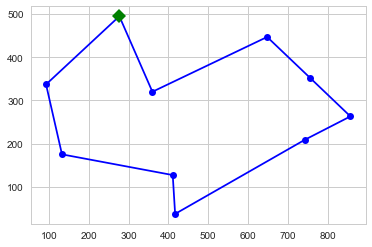

In [93]:
tour = exact_TSP(cities10)
plot_tour(tour)

### Removing redundant tours to increase efficiency
The permutation `(1, 2, 3)` represents the tour that goes from 1 to 2 to 3 and back to 1.  You may have noticed that there aren't really six different tours of three cities: the cities 1, 2, and 3 form a triangle;  any tour must connect the three points of the triangle; and there are really only two ways to do this: clockwise or counterclockwise.   In general, with $n$ cities, there are $n!$ (that is, $n$ factorial) permutations, but only  $(n-1)!$,  tours that are *distinct*: the tours `123`, `231`, and `312` are three ways of representing the *same* tour.

So we can make our `TSP` program $n$ times faster by never considering redundant tours. Arbitrarily, we will say that all tours must start with the "first" city in the set of cities. We don't have to change the definition of `TSP`&mdash;just by making `alltours` return only nonredundant tours, the whole program gets faster.


In [94]:
def all_non_redundant_tours(cities):
    "Return a list of tours, each a permutation of cities, but each one starting with the same city."
    start = first(cities)
    return [[start] + list(tour)
            for tour in itertools.permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    for x in collection: return x

def exact_non_redundant_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(all_non_redundant_tours(cities))

In [95]:
all_non_redundant_tours({1, 2, 3})

[[1, 2, 3], [1, 3, 2]]

### finding time based on First Approach: Exhaustive Search

In [96]:
%timeit exact_TSP(cities8)

115 ms ± 2.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [97]:
%timeit exact_non_redundant_TSP(cities8)

16.2 ms ± 548 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Second approach: Approximate (Heuristic) algorithms

### Greedy approach (Nearest Neighbor approach)
> *Start at any city; at each step extend the tour by moving from the previous city to its nearest neighbor that has not yet been visited.*

This is called a *greedy algorithm*, because it greedily takes what looks best in the short term (the nearest neighbor) even when that won't always be the best in the long term. 

In [98]:
def greedy_TSP(cities):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

In [99]:
def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

In [100]:
cities = generate_cities(10)

In [101]:
%timeit exact_non_redundant_TSP(cities)

1.36 s ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


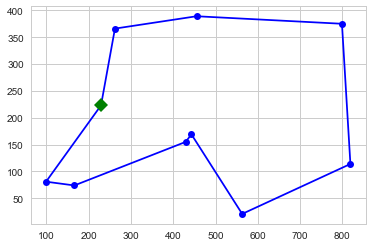

In [102]:
plot_tour(exact_non_redundant_TSP(cities))

In [103]:
%timeit greedy_TSP(cities)

19.1 µs ± 330 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


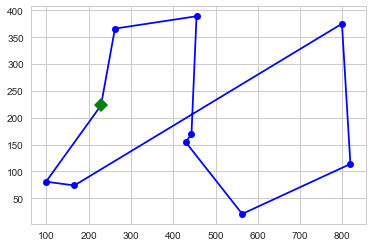

In [104]:
plot_tour(greedy_TSP(cities))

Comparing the time taken to get results for 10 cities, it is clear that greedy approach is efficient compared to the exhaustive search.

A [greedy algorithm](http://en.wikipedia.org/wiki/Greedy_algorithm) is an algorithm that follows the problem solving heuristic of making the locally optimal choice at each stage with the hope of finding a global optimum. In many problems, a greedy strategy does not in general produce an optimal solution, but nonetheless a greedy heuristic may yield locally optimal solutions that approximate a global optimal solution in a reasonable time.

For many problmes greedy algorithms fail to produce the optimal solution, and may even produce the *unique worst possible solution*.

### A thought on computational complexity

<img src='http://imgs.xkcd.com/comics/travelling_salesman_problem.png' align='center' width='65%'/>


# Biologically inspired metaheuristic: Genetic Algorithm (GA)

- We have already studied GA in our lectures and did practice in our labs for one-max problem
- They are an option in which we dedicate a little more computational effort in order to produce better solutions than `greedy_TSP()`.

> We will be using the [DEAP](https://github.com/DEAP/deap) library to code this tackle this problem using a genetic algorithm. We have used DEAP in practical classes in this unit.

[<img src='https://raw.githubusercontent.com/DEAP/deap/master/doc/_static/deap_long.png' width='29%' align='center'/>](https://github.com/DEAP/deap)

In [105]:
from deap import algorithms, base, creator, tools

In [106]:
num_cities = 30
cities = generate_cities(num_cities)

In [107]:
toolbox = base.Toolbox()

In [108]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

C:\Users\Luke\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\Luke\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [109]:
toolbox.register("indices", numpy.random.permutation, len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

In [110]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

In [111]:
def create_tour(individual):
    return [list(cities)[e] for e in individual]

In [112]:
def evaluation(individual):
    '''Evaluates an individual by converting it into 
    a list of cities and passing that list to total_distance'''
    return (total_distance(create_tour(individual)),)

In [113]:
toolbox.register("evaluate", evaluation)

In [114]:
toolbox.register("select", tools.selTournament, tournsize=3)

In [115]:
pop = toolbox.population(n=100)

In [116]:
%%time 
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=400, verbose=False)

Wall time: 3.68 s


Let's check the efficiency of GA

In [117]:
best_individual = tools.selBest(result, k=1)[0]
print('Fitness of the best individual: ', evaluation(best_individual)[0])

Fitness of the best individual:  3622.109872684203


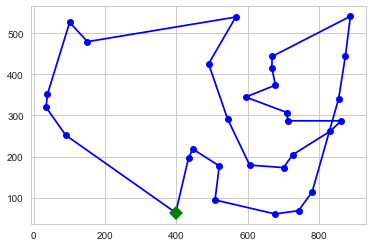

In [118]:
plot_tour(create_tour(best_individual))

It is interesting to assess how the fitness of the population changes as the evolution process proceeds. 

We can prepare a `deap.tools.Statistics` instance to specify what data to collect. 

In [119]:
fit_stats = tools.Statistics(key=operator.attrgetter("fitness.values"))
fit_stats.register('mean', numpy.mean)
fit_stats.register('min', numpy.min)

In [120]:
result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox,
                                  cxpb=0.5, mutpb=0.2,
                                  ngen=400, verbose=False,
                                  stats=fit_stats)

#### Plotting mean and minimum fitness values as evolution proceeds

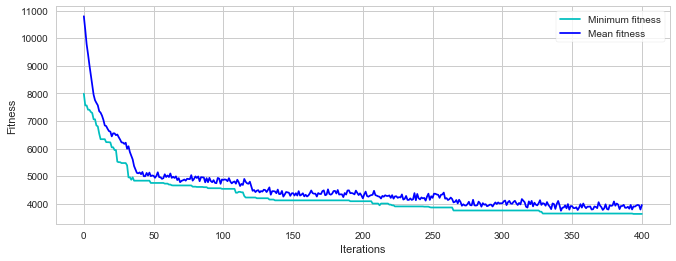

In [121]:
plt.figure(figsize=(11, 4))
plots = plt.plot(log.select('min'),'c-', log.select('mean'), 'b-')
plt.legend(plots, ('Minimum fitness', 'Mean fitness'), frameon=True)
plt.ylabel('Fitness'); plt.xlabel('Iterations');

### Q1. Compare the efficiency (time taken) of Exhaustive search, greedy search and Genetic Algorithm for 30 cities based on the configuration of your machine. If necessary, use estimates, but detail the reason for, and the basis of, the estimates used.  [ 1 Marks]

In [122]:
# Exhaustive Search
print("Exhaustive: ")
%timeit -o exact_TSP(cities10)

#Greedy Search
print("Greedy: ")
%timeit greedy_TSP(cities)

#Genetic Algorithm
print("Genetic: ")
%timeit algorithms.eaSimple(toolbox.population(n=100), toolbox, cxpb=0.8, mutpb=0.2, ngen=400, verbose=False)


Exhaustive: 
12 s ± 42.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Greedy: 
139 µs ± 677 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Genetic: 
3.75 s ± 87.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Q2. Analyse the effect of population size for the above experiment. Try population size having value [25, 50, 75, 100, 125, 150, 175, 200] [ 1.5 Marks]

Text(0.5,1,'Result of Genetic Algorithm on 30 cities with different population sizes')

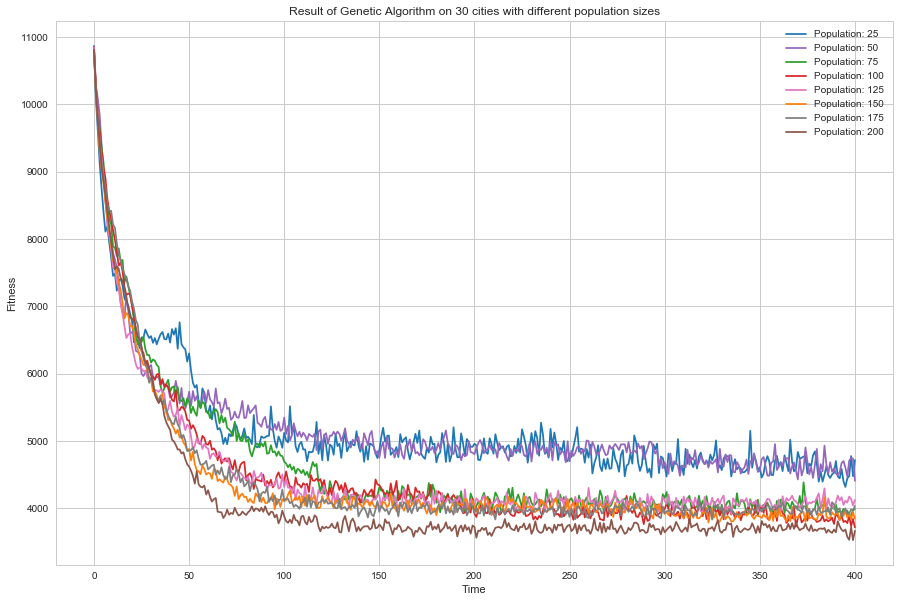

In [123]:
# Write your code here

populationSize = [25, 50, 75, 100, 125, 150, 175, 200]
populationColour = ['tab:blue', 'tab:purple', 'tab:green', 'tab:red', 'tab:pink', 'tab:orange', 'tab:gray', 'tab:brown']

plt.figure(figsize=(15,10))
for i in range(len(populationSize)):
    result, log = algorithms.eaSimple(toolbox.population(n=populationSize[i]), toolbox, cxpb=0.5, mutpb=0.2, ngen=400, verbose=False, stats=fit_stats)
    plt.plot(log.select('mean'), populationColour[i], label='Population: '+str(populationSize[i]))

plt.legend()
plt.ylabel('Fitness')
plt.xlabel('Time')
plt.title('Result of Genetic Algorithm on 30 cities with different population sizes')

### Q3. What is the influence  of mutation probability and cross-over probability over the performance of  GA. [ 1.5 Marks]

Text(0.5,1,'Result of Genetic Algorithm on 30 cities with different population sizes influenced by Crossover Probability')

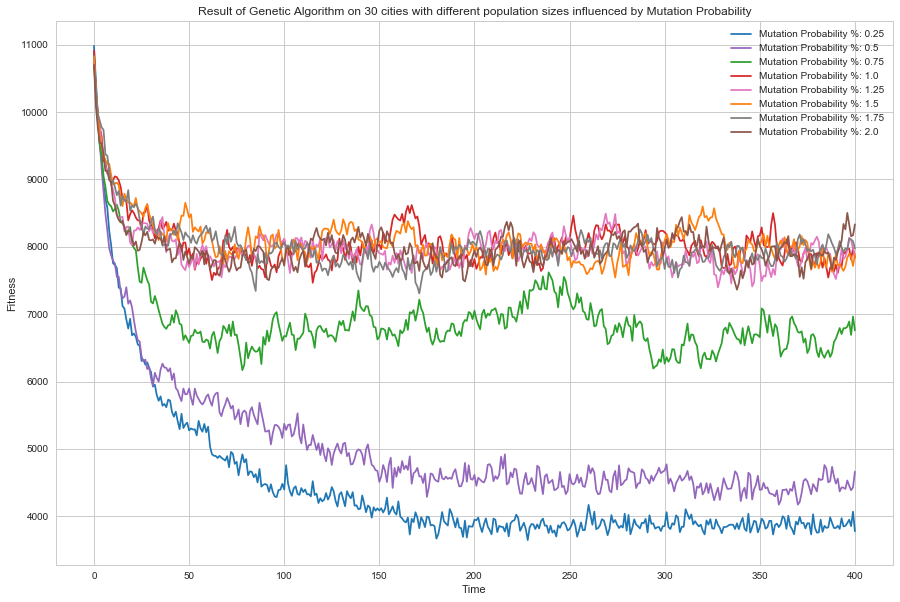

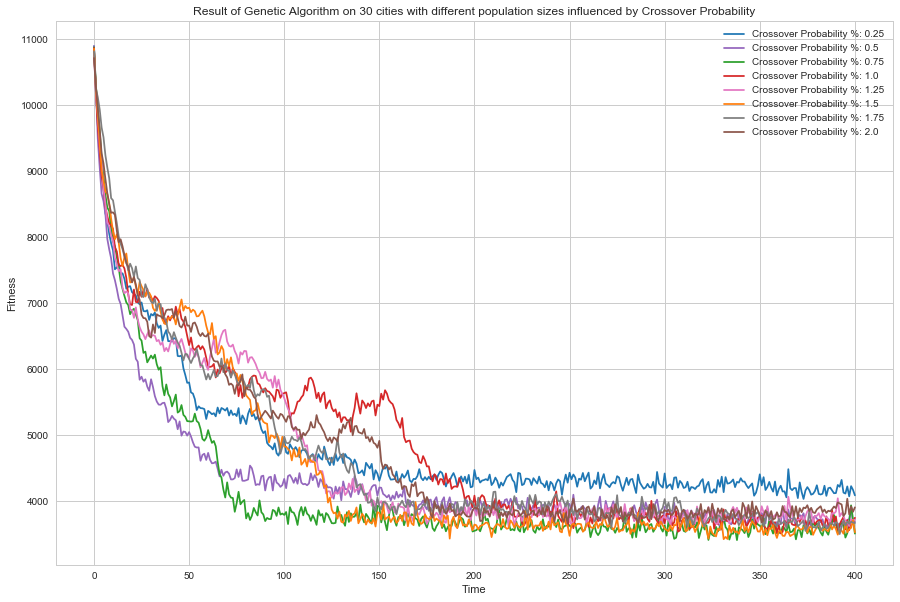

In [124]:
populationColour = ['tab:blue', 'tab:purple', 'tab:green', 'tab:red', 'tab:pink', 'tab:orange', 'tab:gray', 'tab:brown']


#Mutation Probability
mutationProbability = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]

plt.figure(figsize=(15,10))
for i in range(len(mutationProbability)):
    result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox, cxpb=0.5, mutpb=mutationProbability[i], ngen=400, verbose=False, stats=fit_stats)
    plt.plot(log.select('mean'), populationColour[i], label='Mutation Probability %: '+str(mutationProbability[i]))

plt.legend()
plt.ylabel('Fitness')
plt.xlabel('Time');
plt.title('Result of Genetic Algorithm on 30 cities with different population sizes influenced by Mutation Probability')

    
    
#Crossover Probability
crossoverProbability = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]

plt.figure(figsize=(15,10))
for j in range(len(crossoverProbability)):
    result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox, cxpb=crossoverProbability[j], mutpb=0.2, ngen=400, verbose=False, stats=fit_stats)
    plt.plot(log.select('mean'), populationColour[j], label='Crossover Probability %: '+str(crossoverProbability[j]))

plt.legend()
plt.ylabel('Fitness')
plt.xlabel('Time');
plt.title('Result of Genetic Algorithm on 30 cities with different population sizes influenced by Crossover Probability')

    

### Extending GA to real data

We are given a set of 14 GPS positions, each coordinate representing a city in Burma (Officially the Republic of the Union of Myanmar). Our objective is to solve the TSP problem over these 14 cities. You need to do bit of independent research for finding the formula to convert the GPS coodinates of two cities (in latitudes and longitudes) to the actual distance between those two cities.

City[i] = {LAT[i], LON[i]}

In [125]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
        17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
        96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]


### Q4. Calculate the total distance (in Kilometres) of a tour starting with city[0], going in the order given to city[1], city[2], ... city[13] and coming back to city[0],  based on *Latitude* and *Longitude* of the 14 cities above. [2 Marks] 

In [126]:
#To do this I will be using a library called 'geopy'

import geopy
from geopy.distance import geodesic

#Create target array to store cities using given latitude and longitude
cityDistances = []

#Loop through list of latitudes and longitudes using geopy.distance tools to mape these
for i in range(len(LAT)):
    if i == len(LON) - 1:
        cityDistances.append(geodesic((LAT[i], LON[i]), (LAT[0], LON[0])).km)
        break
    cityDistances.append(geodesic((LAT[i], LON[i]), (LAT[i+1], LON[i+1])).km)

roundedResult = round(sum(cityDistances), 4)
print('Total Distance for round trip of 14 cities in Kilometres is: ' + str(roundedResult) +'...') 

Total Distance for round trip of 14 cities in Kilometres is: 4624.3378...
